> ## **DATA LOADING, STORAGE AND FILE FORMATS**
> The main sources of data loading, storage and file formats are:
> 1. Comma Seperated Files (CSV)
> 2. JavaScript Object Notation (JSON)
> 3. API's
> 4. SQL - DataBases
> 5. Web Scrapping

In [1]:
import numpy as np
import pandas as pd

<hr>

> #### 1. read_csv()
> 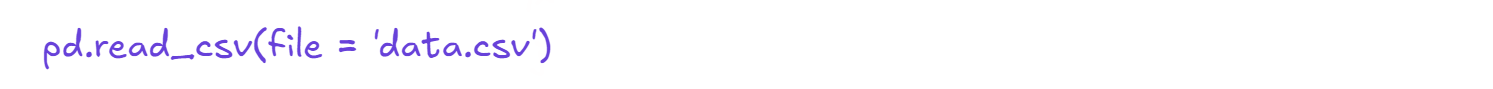

In [3]:
df = pd.read_csv(filepath_or_buffer = 'Iris.csv')
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [16]:
pd.read_csv(filepath_or_buffer = 'Iris.csv', header=[0, 1]).head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
,1,5.1,3.5,1.4,0.2,Iris-setosa
0,2,4.9,3.0,1.4,0.2,Iris-setosa
1,3,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
pd.read_table('housing.csv', sep = ',', header = None).head()

In [4]:
pd.read_table('Iris.csv', sep = ',').head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
pd.read_csv(filepath_or_buffer='Iris.csv',
            sep=',',
            names=['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'],
            index_col= 'Id',
            skiprows=[0, 1, 2, 3],
            na_values=[np.nan, 'NAN', 'na'],
            nrows=5
)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa


In [6]:
handle_missing_vals = {
    'SepalLengthCm': 'NAN',
    'SepalWidthCm': 'na'
}
pd.read_csv('Iris.csv', na_values=handle_missing_vals).head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
pd.read_table('housing.csv', sep = ',', na_values = {'longitude': 'NaN', 'total_bedrooms': '-'}, nrows = 5)

pd.read_table('housing.csv', sep = ',', na_values = ['NaN','-'], nrows = 5)

In [27]:
chunker = pd.read_table(
    'housing.csv',
    sep = ',',
    chunksize = 1000,
)

df = pd.DataFrame()
for chunk in chunker:
    df = pd.concat([df, chunk])

df.shape

   Id  SepalLengthCm
0   1            5.1
1   2            4.9
2   3            4.7
3   4            4.6
4   5            5.0


In [20]:
pd.read_csv('Iris.csv', usecols=['SepalLengthCm', 'SepalWidthCm']).head(5)

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [24]:
pd.read_csv('Iris.csv', encoding='UTF-8').head(5)

encoding_formats = [
    'UTF-8',  # 8-bit Unicode Transformation Format
    'UTF-16',  # 16-bit Unicode Transformation Format
    'UTF-32',  # 32-bit Unicode Transformation Format
    'Latin-1'  # Another name for ISO-8859-1
    'ISO-8859-1',  # Latin-1, single-byte encoding for Western European languages
    'ASCII',  # American Standard Code for Information Interchange
    'Windows-1252',  # A superset of ISO-8859-1 used in Windows
]
print("Available encoding formats:", encoding_formats)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
pd.read_csv('Iris.csv', keep_default_na=False).head(5)
# Null values will get eleminated

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
pd.read_table('housing.csv', sep = ',', converters = {'foo': (lambda x: x + 1)}, nrows = 5)

<hr>

> #### 2. to_csv()
> 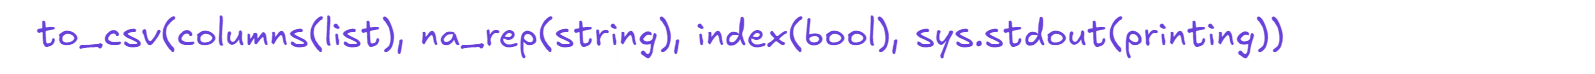

In [38]:
import sys
df.to_csv(
    sys.stdout, 
    sep='|', 
    columns=['SepalWidthCm', 'Species'],
    header=True,
    na_rep="Null",
    index=True,
    index_label="index",
    encoding='UTF-8'
)

index|SepalWidthCm|Species
0|3.5|Iris-setosa
1|3.0|Iris-setosa
2|3.2|Iris-setosa
3|3.1|Iris-setosa
4|3.6|Iris-setosa
5|3.9|Iris-setosa
6|3.4|Iris-setosa
7|3.4|Iris-setosa
8|2.9|Iris-setosa
9|3.1|Iris-setosa
10|3.7|Iris-setosa
11|3.4|Iris-setosa
12|3.0|Iris-setosa
13|3.0|Iris-setosa
14|4.0|Iris-setosa
15|4.4|Iris-setosa
16|3.9|Iris-setosa
17|3.5|Iris-setosa
18|3.8|Iris-setosa
19|3.8|Iris-setosa
20|3.4|Iris-setosa
21|3.7|Iris-setosa
22|3.6|Iris-setosa
23|3.3|Iris-setosa
24|3.4|Iris-setosa
25|3.0|Iris-setosa
26|3.4|Iris-setosa
27|3.5|Iris-setosa
28|3.4|Iris-setosa
29|3.2|Iris-setosa
30|3.1|Iris-setosa
31|3.4|Iris-setosa
32|4.1|Iris-setosa
33|4.2|Iris-setosa
34|3.1|Iris-setosa
35|3.2|Iris-setosa
36|3.5|Iris-setosa
37|3.1|Iris-setosa
38|3.0|Iris-setosa
39|3.4|Iris-setosa
40|3.5|Iris-setosa
41|2.3|Iris-setosa
42|3.2|Iris-setosa
43|3.5|Iris-setosa
44|3.8|Iris-setosa
45|3.0|Iris-setosa
46|3.8|Iris-setosa
47|3.2|Iris-setosa
48|3.7|Iris-setosa
49|3.3|Iris-setosa
50|3.2|Iris-versicolor
51|3.2|Iri

In [35]:
# On Series
sr = pd.Series([1,2,3,4,5])
sr.to_csv(sys.stdout, sep=',', index_label="id",)

id,0
0,1
1,2
2,3
3,4
4,5


<hr>

> ### CSV Module

In [3]:
import csv
f = open('housing.csv')
reader = csv.reader(f) # Returns a list of values and columns prestnt in the csv file
print('iterator ->', reader)
for line in reader:
    print(line)
    break

iterator -> <_csv.reader object at 0x000001A0B5CB6C80>
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [41]:
with open('Iris.csv') as f:
    lines = list(csv.reader(f))

header, values = lines[0], lines[1::]

In [42]:
temp = zip(*values)
for i in temp:
    print(i)

('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150')
('5.1', '4.9', '4.7', '4.6', '5.0', '5.4', '4.6', '5.0', 

In [46]:
data_dict = {k: v for k, v in zip(header, zip(*values))} # Consider *values as destructuring the list values
data_dict

{'Id': ('1',
  '2',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '13',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '34',
  '35',
  '36',
  '37',
  '38',
  '39',
  '40',
  '41',
  '42',
  '43',
  '44',
  '45',
  '46',
  '47',
  '48',
  '49',
  '50',
  '51',
  '52',
  '53',
  '54',
  '55',
  '56',
  '57',
  '58',
  '59',
  '60',
  '61',
  '62',
  '63',
  '64',
  '65',
  '66',
  '67',
  '68',
  '69',
  '70',
  '71',
  '72',
  '73',
  '74',
  '75',
  '76',
  '77',
  '78',
  '79',
  '80',
  '81',
  '82',
  '83',
  '84',
  '85',
  '86',
  '87',
  '88',
  '89',
  '90',
  '91',
  '92',
  '93',
  '94',
  '95',
  '96',
  '97',
  '98',
  '99',
  '100',
  '101',
  '102',
  '103',
  '104',
  '105',
  '106',
  '107',
  '108',
  '109',
  '110',
  '111',
  '112',
  '113',
  '114',
  '115',
  '116',
  '117',
  '118',
  '119',
  '120',
  '121',
  '122',
  '1

<hr>

> #### `JSON data`

In [4]:
import json

jsn = """{
    "name": ["Scout", "Mortal", "Snax", "Joker"],
    "age": [26, 27, 23, 31],
    "game": ["PUBG", "BGMI", "Valo", "Gta"]
}
"""
data = json.loads(jsn)
data

{'name': ['Scout', 'Mortal', 'Snax', 'Joker'],
 'age': [26, 27, 23, 31],
 'game': ['PUBG', 'BGMI', 'Valo', 'Gta']}

In [48]:
json_df = pd.read_json('temp.json')
json_df

,name,age,game
0,Scout,26,PUBG
1,Mortal,27,BGMI
2,Snax,23,Valo
3,Joker,31,Gta


In [49]:
json_df.to_json(orient='records')
# Creats list of JSON of each record

'[{"name":"Scout","age":26,"game":"PUBG"},{"name":"Mortal","age":27,"game":"BGMI"},{"name":"Snax","age":23,"game":"Valo"},{"name":"Joker","age":31,"game":"Gta"}]'

In [5]:
json.dumps(data)

'{"name": ["Scout", "Mortal", "Snax", "Joker"], "age": [26, 27, 23, 31], "game": ["PUBG", "BGMI", "Valo", "Gta"]}'

In [3]:
import json

jsn = {
    "name": "John",
    "age": 30
}
json.dumps(jsn)
# The json.dumps() function converts a Python object (like a dictionary or list) into a JSON string.
# To save a JSON file, you can use the following code:
with open('output.json', 'w') as json_file:
    json.dump(jsn, json_file)
# This will write the JSON string representation of the Python object to a file named 'output.json'.

### Excel Files

In [2]:
xlsx = pd.read_excel('Book1.xlsx')
xlsx

,1,a,Scout
0,2,b,Mortal
1,3,c,Snax
2,4,d,Joker
3,5,e,Payal


### Working with API 

In [18]:
import requests

api = 'https://jsonplaceholder.typicode.com/posts'
res = requests.get(api)

data = res.json()
data[0]

{'userId': 1,
 'id': 1,
 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit',
 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}

In [19]:
temp = pd.DataFrame(data)
temp.head()

,userId,id,title,body
0,1,1,sunt aut facere repellat provident occaecati e...,quia et suscipit\nsuscipit recusandae consequu...
1,1,2,qui est esse,est rerum tempore vitae\nsequi sint nihil repr...
2,1,3,ea molestias quasi exercitationem repellat qui...,et iusto sed quo iure\nvoluptatem occaecati om...
3,1,4,eum et est occaecati,ullam et saepe reiciendis voluptatem adipisci\...
4,1,5,nesciunt quas odio,repudiandae veniam quaerat sunt sed\nalias aut...


## Connection to MySQL

In [ ]:
import mysql.connector
from mysql.connector import Error  # Import Error class for exception handling

db = None  # Initialize db variable

try:
    db = mysql.connector.connect(
        host="", # _._._._ not the localhost
        user="root",
        password="Your Password",
    )
    
    if db.is_connected():
        print("Connected to MySQL Database")

except Error as e:  # Catch any errors during connection
    print(f"Error: {e}")  # Print the error message

finally:
    if db is not None and db.is_connected():
        cursor = db.cursor()
        cursor.execute("CREATE DATABASE IF NOT EXISTS mydatabase;")
        db.close()  # Ensure the database connection is closed

## WebScrapping

In [1]:
import requests
from bs4 import BeautifulSoup

# URL of the site you want to scrape
url = 'https://excalidraw.com/'

# Send a GET request to the website
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the page
    html_content = response.text
    
    # Initialize BeautifulSoup with the HTML content
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # Print the formatted HTML code
    print(soup.prettify())
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Excalidraw | Hand-drawn look &amp; feel • Collaborative • Secure
  </title>
  <meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no,viewport-fit=cover,shrink-to-fit=no" name="viewport"/>
  <meta content="origin" name="referrer"/>
  <meta content="yes" name="mobile-web-app-capable"/>
  <meta content="#121212" name="theme-color"/>
  <meta content="Excalidraw — Collaborative whiteboarding made easy" name="title"/>
  <meta content="Excalidraw is a virtual collaborative whiteboard tool that lets you easily sketch diagrams that have a hand-drawn feel to them." name="description"/>
  <meta content="https://excalidraw.com/og-image-3.png" name="image"/>
  <meta content="Excalidraw" property="og:site_name"/>
  <meta content="website" property="og:type"/>
  <meta content="https://excalidraw.com" property="og:url"/>
  <meta content="Excalidraw — Collaborative whiteboarding made easy" proper

In [5]:
body = soup.body
body.p

In [13]:
soup.head

<head><meta charset="utf-8"/><title>Excalidraw | Hand-drawn look &amp; feel • Collaborative • Secure</title><meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=no,viewport-fit=cover,shrink-to-fit=no" name="viewport"/><meta content="origin" name="referrer"/><meta content="yes" name="mobile-web-app-capable"/><meta content="#121212" name="theme-color"/><meta content="Excalidraw — Collaborative whiteboarding made easy" name="title"/><meta content="Excalidraw is a virtual collaborative whiteboard tool that lets you easily sketch diagrams that have a hand-drawn feel to them." name="description"/><meta content="https://excalidraw.com/og-image-3.png" name="image"/><meta content="Excalidraw" property="og:site_name"/><meta content="website" property="og:type"/><meta content="https://excalidraw.com" property="og:url"/><meta content="Excalidraw — Collaborative whiteboarding made easy" property="og:title"/><meta content="Excalidraw logo" property="og:image:alt"/><meta co